In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
import plotly.graph_objects as go

**1 Pick a stock of your choice which is being traded in the derivative market.**

In [ ]:
stock_symbol = "AAPL"  # Apple Inc.

# 2. Retrieve historical stock data

data = yf.download(stock_symbol, start="2023-04-17", end="2024-04-16")

#print("Historical Stock Data:")
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-04-17  165.089996  165.389999  164.029999  165.229996  164.352737   
2023-04-18  166.100006  167.410004  165.649994  166.470001  165.586166   
2023-04-19  165.800003  168.160004  165.539993  167.630005  166.739990   
2023-04-20  166.089996  167.869995  165.559998  166.649994  165.765198   
2023-04-21  165.050003  166.449997  164.490005  165.020004  164.143860   

              Volume  
Date                  
2023-04-17  41516200  
2023-04-18  49923000  
2023-04-19  47720200  
2023-04-20  52456400  
2023-04-21  58337300  


**2 Look at the stock’s and option’s history on YAHOO Finance.**

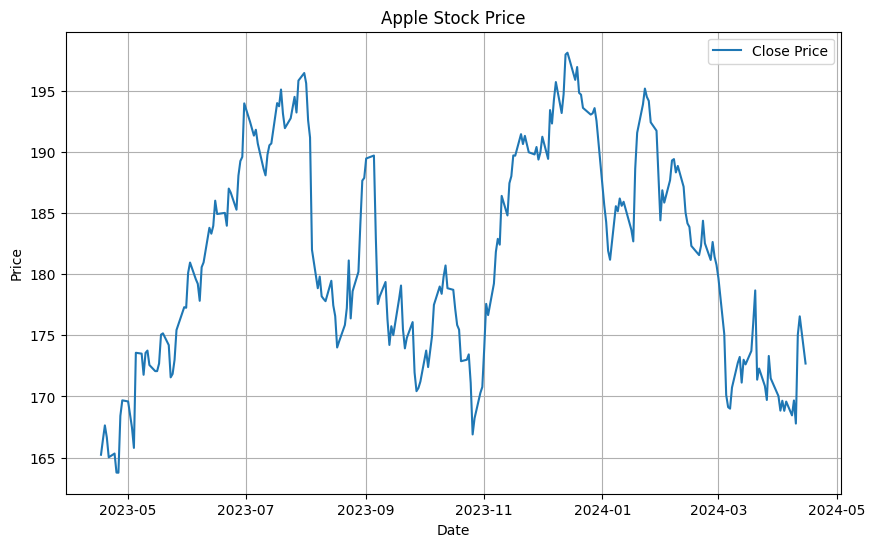

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

**3 Use past one-year data to estimate the annual volatility.**

In [ ]:
data['daily_returns'] = data['Close'].pct_change()

In [ ]:
daily_volatility = data['daily_returns'].std()
annual_volatility = daily_volatility * (252 ** 0.5)
print("Annual Volatility:", annual_volatility)

Annual Volatility: 0.1958141070404688



**4 Use 10 years US treasury rate as the rate of interest.**

In [ ]:
# rate_of_interest = 4.52 / 100

spot_price = 172.554993
risk_free_rate = 0.0452
volatility = 0.2



**5. Now fix different strike prices and time of maturity to evaluate the call/ put option price by using Binomial model**

In [ ]:
# strike prices
strike_price = [170,175, 180, 185, 190, 192]
time_to_maturity = [0.5, 0.75, 1, 1.25, 1.5, 2]

In [ ]:
def put_call_parity(C0, K, T, r, S0):
    '''
    returns put option price based on put-call parity
    '''
    P0 = C0 - S0 + K * np.exp(-r * T)
    return P0

**Binomial Model**

In [ ]:
def binomial_option_price(S, K, T, r, sigma, option_type='call', steps=1000):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)

    for i in range(steps + 1):
        stock_prices[i] = S * (u ** (steps - i)) * (d ** i)

    for i in range(steps + 1):
        if option_type == 'call':
            option_values[i] = max(stock_prices[i] - K, 0)
        elif option_type == 'put':
            option_values[i] = max(K - stock_prices[i], 0)

    for j in range(steps, 0, -1):
        for i in range(j):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])

    return option_values[0]

steps = 10
binomial_call = []
binomial_put = []
for i in range(len(strike_price)):
  print('Strike Price',strike_price[i])
  print('Time of maturity',time_to_maturity[i])
  call_option_price = binomial_option_price(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='call', steps=steps)
  print("Call Option Price:", call_option_price)
  binomial_call.append(call_option_price)

  put_option_price = binomial_option_price(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='put', steps=steps)
  print("Put Option Price:", put_option_price)
  binomial_put.append(put_option_price)

Strike Price 170
Time of maturity 0.5
Call Option Price: 13.070615361165098
Put Option Price: 6.716711744061004
Strike Price 175
Time of maturity 0.75
Call Option Price: 13.521722241204538
Put Option Price: 10.133658399877637
Strike Price 180
Time of maturity 1
Call Option Price: 14.21686559285744
Put Option Price: 13.707006854830881
Strike Price 185
Time of maturity 1.25
Call Option Price: 14.67822612037065
Put Option Price: 16.9605327519727
Strike Price 190
Time of maturity 1.5
Call Option Price: 14.97609154084787
Put Option Price: 19.966093968940783
Strike Price 192
Time of maturity 2
Call Option Price: 18.51413972886969
Put Option Price: 21.363758422028145


**Black Scholes Model**

**6. Evaluate the option price by using Black Scholes Formula**

In [ ]:
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    return option_price

bs_call = []
bs_put = []
for i in range(len(strike_price)):
  print('Strike Price',strike_price[i])
  print('Time of maturity',time_to_maturity[i])
  call_option_price_bs = black_scholes(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='call')
  print("Call Option Price (Black-Scholes):", call_option_price_bs)
  bs_call.append(call_option_price_bs)

  put_option_price_bs = black_scholes(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='put')
  print("Put Option Price (Black-Scholes):", put_option_price_bs)
  bs_put.append(put_option_price_bs)

Strike Price 170
Time of maturity 0.5
Call Option Price (Black-Scholes): 13.05855728808919
Put Option Price (Black-Scholes): 6.704653670984968
Strike Price 175
Time of maturity 0.75
Call Option Price (Black-Scholes): 13.56258261303509
Put Option Price (Black-Scholes): 10.174518771708165
Strike Price 180
Time of maturity 1
Call Option Price (Black-Scholes): 13.981104381843181
Put Option Price (Black-Scholes): 13.471245643816701
Strike Price 185
Time of maturity 1.25
Call Option Price (Black-Scholes): 14.347978270859869
Put Option Price (Black-Scholes): 16.630284902462037
Strike Price 190
Time of maturity 1.5
Call Option Price (Black-Scholes): 14.683150074281485
Put Option Price (Black-Scholes): 19.673152502374492
Strike Price 192
Time of maturity 2
Call Option Price (Black-Scholes): 18.174046677970694
Put Option Price (Black-Scholes): 21.02366537112914


**7. Increase the number of steps in Binomial model to verify that the price converges to 6.**

In [ ]:
def binomial_option_price(S, K, T, r, sigma, option_type='call', steps=1000):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)

    for i in range(steps + 1):
        stock_prices[i] = S * (u ** (steps - i)) * (d ** i)

    for i in range(steps + 1):
        if option_type == 'call':
            option_values[i] = max(stock_prices[i] - K, 0)
        elif option_type == 'put':
            option_values[i] = max(K - stock_prices[i], 0)

    for j in range(steps, 0, -1):
        for i in range(j):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])

    return option_values[0]

steps = 100
for i in range(len(strike_price)):
  print('Strike Price',strike_price[i])
  print('Time of maturity',time_to_maturity[i])
  call_option_price_converged = binomial_option_price(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='call', steps=steps)
  print("Call Option Price (Binomial Model with", steps, "steps):", call_option_price_converged)

  put_option_price_converged = binomial_option_price(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='put', steps=steps)
  print("Put Option Price (Binomial Model with", steps, "steps):", put_option_price_converged)


Strike Price 170
Time of maturity 0.5
Call Option Price (Binomial Model with 100 steps): 13.08103829408337
Put Option Price (Binomial Model with 100 steps): 6.727134676978432
Strike Price 175
Time of maturity 0.75
Call Option Price (Binomial Model with 100 steps): 13.588281057593095
Put Option Price (Binomial Model with 100 steps): 10.200217216264276
Strike Price 180
Time of maturity 1
Call Option Price (Binomial Model with 100 steps): 13.95793892913785
Put Option Price (Binomial Model with 100 steps): 13.448080191110945
Strike Price 185
Time of maturity 1.25
Call Option Price (Binomial Model with 100 steps): 14.379612859347409
Put Option Price (Binomial Model with 100 steps): 16.661919490948748
Strike Price 190
Time of maturity 1.5
Call Option Price (Binomial Model with 100 steps): 14.643505865152951
Put Option Price (Binomial Model with 100 steps): 19.633508293244795
Strike Price 192
Time of maturity 2
Call Option Price (Binomial Model with 100 steps): 18.15284914633526
Put Option Pr

**8. Draw the graph to show 7.**

In [ ]:
def binomial_option_price(S, K, T, r, sigma, option_type='call', steps=1000):
    dt = T / steps
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    stock_prices = np.zeros(steps + 1)
    option_values = np.zeros(steps + 1)

    for i in range(steps + 1):
        stock_prices[i] = S * (u ** (steps - i)) * (d ** i)

    for i in range(steps + 1):
        if option_type == 'call':
            option_values[i] = max(stock_prices[i] - K, 0)
        elif option_type == 'put':
            option_values[i] = max(K - stock_prices[i], 0)

    for j in range(steps, 0, -1):
        for i in range(j):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])

    return option_values[0]

In [ ]:
max_steps = 100
steps_range = range(1, max_steps + 1)
for i in range(len(strike_price)):
  call_option_prices = [binomial_option_price(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='call', steps=steps) for steps in steps_range]
  put_option_prices = [binomial_option_price(spot_price, strike_price[i], time_to_maturity[i], risk_free_rate, volatility, option_type='put', steps=steps) for steps in steps_range]

  trace = go.Scatter(
      x=list(steps_range),
      y=call_option_prices,
      mode='lines',
      name='Call Option Price'
  )
  trace1 = go.Scatter(
      x=list(steps_range),
      y=put_option_prices,
      mode='lines',
      name='Put Option Price'
  )
  constant_line = go.Scatter(
        x=[1, max_steps],
        y=[bs_call[i]] * 2,
        mode='lines',
        name='Black Scholes call price',
        line=dict(color='red', dash='dash')
    )
  constant_line1 = go.Scatter(
        x=[1, max_steps],
        y=[bs_put[i]] * 2,
        mode='lines',
        name='Black Scholes put price',
        line=dict(color='black', dash='dash')
    )

  layout = go.Layout(
      title=f'Convergence of Option Price for K = {strike_price[i]} and T = {time_to_maturity[i]}',
      xaxis=dict(title='Number of Steps'),
      yaxis=dict(title='Option Price'),
      legend=dict(x=0.7, y=0.9),
      width=700,
      height=300
  )

  fig = go.Figure(data=[trace,trace1, constant_line,constant_line1], layout=layout)
  fig.show()

**9. Compare with the actual market data**

In [ ]:
max_steps = 100
steps_range = range(1, max_steps + 1)

call_option_prices = [binomial_option_price(spot_price, 175, 0.5, risk_free_rate, volatility, option_type='call', steps=steps) for steps in steps_range]
put_option_prices = [binomial_option_price(spot_price, 175, 0.5, risk_free_rate, volatility, option_type='put', steps=steps) for steps in steps_range]

trace = go.Scatter(
    x=list(steps_range),
    y=call_option_prices,
    mode='lines',
    name='Call Option Price'
)
trace1 = go.Scatter(
    x=list(steps_range),
    y=put_option_prices,
    mode='lines',
    name='Put Option Price'
)
constant_line = go.Scatter(
      x=[1, max_steps],
      y=[10.28] * 2,
      mode='lines',
      name='Actual market call price',
      line=dict(color='red', dash='dash')
  )
constant_line1 = go.Scatter(
      x=[1, max_steps],
      y=[11.93] * 2,
      mode='lines',
      name='Actual market put price',
      line=dict(color='black', dash='dash')
  )

layout = go.Layout(
    title=f'Calculated Option Price vs Actual Market Values for K = 175 and T = 0.5 years',
    xaxis=dict(title='Number of Steps'),
    yaxis=dict(title='Option Price'),
    legend=dict(x=0.7, y=0.9),
    width=700,
    height=300
)

fig = go.Figure(data=[trace, constant_line], layout=layout)
fig.show()

**Delta Neutral**

In [ ]:
import yfinance as yf
Apple = yf.Ticker("AAPL")
Apple_data = Apple.history(period="1y")

In [ ]:
S0 = data['Close'][0]    # current stock price
σ = .2    # annual volatility
r = .0452    # interest rate
n = 2    # number of time steps
T = 1
K = 100

In [ ]:
ticker_symbol = "AAPL"
options_data = yf.Ticker(ticker_symbol).options
expiry_date = options_data[0]
options_chain = yf.Ticker(ticker_symbol).option_chain(expiry_date)

calls = pd.DataFrame(options_chain.calls)
puts = pd.DataFrame(options_chain.puts)

In [ ]:
calls['lastTradeDate'] = pd.to_datetime(calls['lastTradeDate']).dt.date
start_date, end_date = "2023-01-28", "2024-04-01"
calls = calls[(calls['lastTradeDate'] >= pd.to_datetime(start_date).date()) & (calls['lastTradeDate'] <= pd.to_datetime(end_date).date())]
calls.reset_index(inplace = True, drop = True)
calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240419C00030000,2024-03-27,30.0,142.65,135.30,135.95,0.0,0.0,30.0,45,14.421876,True,REGULAR,USD
1,AAPL240419C00055000,2024-03-14,55.0,118.80,120.70,122.25,0.0,0.0,5.0,5,23.912112,True,REGULAR,USD
2,AAPL240419C00060000,2024-03-27,60.0,112.60,105.25,105.95,0.0,0.0,1.0,0,8.578130,True,REGULAR,USD
3,AAPL240419C00070000,2024-03-13,70.0,101.60,105.85,106.45,0.0,0.0,NaN,1,19.066410,True,REGULAR,USD
4,AAPL240419C00090000,2024-02-14,90.0,94.81,81.00,84.55,0.0,0.0,1.0,204,12.512697,True,REGULAR,USD


In [ ]:
Apple_data.index = pd.to_datetime(Apple_data.index)
Apple_data.index = Apple_data.index.strftime("%Y-%m-%d")
Apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-19,164.919720,167.267190,164.661090,166.740005,47720200,0.0,0.0
2023-04-20,165.208173,166.978722,164.680989,165.765198,52456400,0.0,0.0
2023-04-21,164.173699,165.566260,163.616675,164.143860,58337300,0.0,0.0
2023-04-24,164.123945,164.720765,163.019837,164.452194,41949600,0.0,0.0
2023-04-25,164.312941,165.426990,162.860686,162.900482,48714100,0.0,0.0


In [ ]:
expiry_date = pd.to_datetime(expiry_date).date()


In [ ]:
initialPrice_call = []
for date in calls['lastTradeDate']:
    date = pd.to_datetime(date)
    date = date.strftime("%Y-%m-%d")
    initialPrice = Apple_data.loc[date, 'Close']
    initialPrice_call.append(initialPrice)
calls['initialPrice'] = initialPrice_call

In [ ]:
maturity_periods_call = []
for i in calls['lastTradeDate']:
    maturity_period = (expiry_date - i).days
    maturity_periods_call.append(maturity_period)

calls['maturityPeriod'] = maturity_periods_call


In [ ]:
puts['lastTradeDate'] = pd.to_datetime(puts['lastTradeDate']).dt.date
start_date = "2023-03-28"
end_date = "2024-04-01"
puts = puts[(puts['lastTradeDate'] >= pd.to_datetime(start_date).date()) & (puts['lastTradeDate'] <= pd.to_datetime(end_date).date())]
puts.reset_index(inplace = True, drop = True)
puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL240419P00065000,2024-02-20,65.0,0.01,0.0,0.02,0.0,0.0,NaN,35,5.875003,False,REGULAR,USD
1,AAPL240419P00070000,2024-03-22,70.0,0.01,0.0,0.00,0.0,0.0,4.0,34,0.500005,False,REGULAR,USD
2,AAPL240419P00075000,2024-03-15,75.0,0.01,0.0,0.01,0.0,0.0,1.0,303,4.750004,False,REGULAR,USD
3,AAPL240419P00085000,2024-03-05,85.0,0.02,0.0,0.02,0.0,0.0,5.0,1054,4.250005,False,REGULAR,USD
4,AAPL240419P00230000,2024-02-14,230.0,46.04,57.0,58.25,0.0,0.0,1.0,0,0.000010,True,REGULAR,USD


In [ ]:
initialPrice_put = []
for date in puts['lastTradeDate']:
    date = pd.to_datetime(date)
    date = date.strftime("%Y-%m-%d")
    initialPrice = Apple_data.loc[date, 'Close']
    initialPrice_put.append(initialPrice)
puts['initialPrice'] = initialPrice_put

<ipython-input-24-73ba01051aa4>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
maturity_periods_put = []
for i in puts['lastTradeDate']:
    maturity_period = (expiry_date - i).days
    maturity_periods_put.append(maturity_period)

In [ ]:
puts['maturityPeriod'] = maturity_periods_put


In [ ]:
def portfolio(S0, K, T, r, sigma, option='call', batch_size = 10):
    d1 = (np.log(S0 / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * np.sqrt(T))
    delta = norm.cdf(d1)
    curr_delta = delta * batch_size

    if option == 'call':
        x = (batch_size * delta) / (1 - delta)
    elif option == 'put':
        x = (batch_size * (1 - delta)) / delta
        delta = delta - 1

    return x , delta

portfolio_call, delta_call = [], []

for i in range(len(calls)):
    date = calls.loc[i, 'lastTradeDate']
    date = pd.to_datetime(date)
    date = date.strftime("%Y-%m-%d")
    initialPrice = Apple_data.loc[date, 'Close']
    temp = portfolio(initialPrice, calls.loc[i, 'strike'], calls.loc[i, 'maturityPeriod'], r, σ, option='call')
    portfolio_call.append(temp[0])
    delta_call.append(temp[1])

portfolio_put, delta_put = [], []
for i in range(len(puts)):
    date = puts.loc[i, 'lastTradeDate']
    date = pd.to_datetime(date)
    date = date.strftime("%Y-%m-%d")
    initialPrice = Apple_data.loc[date, 'Close']
    temp = portfolio(initialPrice, puts.loc[i, 'strike'], puts.loc[i, 'maturityPeriod'], r, σ, option='put')
    portfolio_put.append(temp[0])
    delta_put.append(temp[1])

    call_table = pd.DataFrame({
    'Strike (K)': calls['strike'],
    'Time to Maturity (T in days)': calls['maturityPeriod'],
    'Risk-Free Rate (r)': r,
    'Volatility (σ)': σ,
    'Call Delta': delta_call,
    'Portfolio (number of put options)': portfolio_call
})
call_table

,Strike (K),Time to Maturity (T in days),Risk-Free Rate (r),Volatility (σ),Call Delta,Portfolio (number of put options)
0,30.0,23,0.0452,0.2,0.999653,28814.072628
1,55.0,36,0.0452,0.2,0.998198,5540.714356
2,60.0,23,0.0452,0.2,0.996200,2621.532644
3,70.0,37,0.0452,0.2,0.996714,3033.190207
4,90.0,65,0.0452,0.2,0.998938,9405.599308
5,255.0,36,0.0452,0.2,0.948733,185.056863
6,270.0,22,0.0452,0.2,0.852025,57.578943
7,285.0,37,0.0452,0.2,0.941057,159.655609
8,290.0,57,0.0452,0.2,0.984663,642.026649


In [ ]:
put_data = pd.DataFrame({
    'Strike (K)': puts['strike'],
    'Time to Maturity (T in days)': puts['maturityPeriod'],
    'Risk-Free Rate (r)': r,
    'Volatility (σ)': σ,
    'Put Delta': delta_put,
    'Portfolio (number of call options)': portfolio_put
})
put_data

,Strike (K),Time to Maturity (T in days),Risk-Free Rate (r),Volatility (σ),Put Delta,Portfolio (number of call options)
0,65.0,59,0.0452,0.2,-0.000755,0.007557
1,70.0,28,0.0452,0.2,-0.004997,0.050220
2,75.0,35,0.0452,0.2,-0.004230,0.042476
3,85.0,45,0.0452,0.2,-0.003425,0.034369
4,230.0,65,0.0452,0.2,-0.006380,0.064207
5,240.0,142,0.0452,0.2,-0.000077,0.000769
6,245.0,88,0.0452,0.2,-0.001680,0.016826
7,250.0,150,0.0452,0.2,-0.000052,0.000519
8,255.0,50,0.0452,0.2,-0.019613,0.200049
9,275.0,36,0.0452,0.2,-0.058235,0.618356


**Implied Volatility**

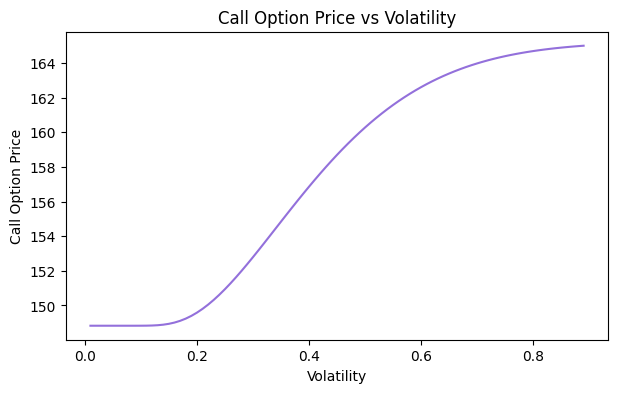

In [ ]:
S0 = data['Close'][0]    # current stock price
σ = .2    # annual volatility
r = .0452    # interest rate
n = 2    # number of time steps
T = 1
K = 100

import matplotlib.pyplot as plt
σs = np.arange(0.01, 0.9, 0.01)
C = [black_scholes(S0, K, 40, r, σ, "call") for σ in σs]
plt.figure(figsize=(7, 4))
plt.plot(σs, C, c='mediumpurple')
plt.title("Call Option Price vs Volatility")
plt.xlabel("Volatility")
plt.ylabel("Call Option Price")
plt.show()

In [ ]:
def newton_raphson(function, initial_guess, tolerance=1e-6, max_iterations=100, dh=1e-6):
    '''
    finds root of a function using newton-raphson method
    '''
    x = initial_guess
    for _ in range(max_iterations):
        fx = function(x)
        if abs(fx) < tolerance:
            return x
        dfx = (function(x + dh) - function(x)) / dh
        if dfx == 0:
            break
        x = x - fx / (dfx + 1e-6)
        if x < 0:
            x = dh
    return x

In [ ]:
def implied_volatitlity(S0, K, r, T, CP, option='call'):
    def H(σ):
        return (black_scholes(S0, K, T, r, σ, option) - CP)**2

    val = newton_raphson(H, 1.0)
    if np.abs(H(val) - H(0.0)) < 1e-5:
        return 0.0
    return val * 100

In [ ]:
call_volatility = []
for i in range(len(calls)):
    date = calls.loc[i, 'lastTradeDate']
    date = pd.to_datetime(date)
    date = date.strftime("%Y-%m-%d")
    initialPrice = Apple_data.loc[date, 'Close']
    temp = implied_volatitlity(initialPrice, calls.loc[i, 'strike'], r, calls.loc[i, 'maturityPeriod']/365, calls.loc[i, 'lastPrice'], option='call')
    call_volatility.append(temp)

put_volatility = []
for i in range(1, len(puts)):
    date = puts.loc[i, 'lastTradeDate']
    date = pd.to_datetime(date)
    date = date.strftime("%Y-%m-%d")
    initialPrice = Apple_data.loc[date, 'Close']
    temp = implied_volatitlity(initialPrice, puts.loc[i, 'strike'], r, puts.loc[i, 'maturityPeriod']/365, puts.loc[i, 'lastPrice'], option='put')
    put_volatility.append(temp)

<ipython-input-10-307ba864c97e>:2: RuntimeWarning:

divide by zero encountered in scalar divide



In [ ]:
call_data = calls[['strike', 'lastPrice', 'maturityPeriod']].copy()
call_data.rename(columns={'strike': 'K', 'lastPrice': 'C', 'maturityPeriod': 'T'}, inplace=True)
call_data['S0'] = [Apple_data.loc[pd.to_datetime(date).strftime("%Y-%m-%d"), 'Close'] for date in calls['lastTradeDate']]
call_data['r'] = r
call_data['Implied Volatility(%)'] = call_volatility

In [ ]:
call_data

,K,C,T,S0,r,Implied Volatility(%)
0,30.0,142.65,23,173.309998,0.0452,0.000000
1,55.0,118.80,36,173.000000,0.0452,0.000000
2,60.0,112.60,23,173.309998,0.0452,0.000000
3,70.0,101.60,37,171.130005,0.0452,122.382022
4,90.0,94.81,65,184.149994,0.0452,0.000000
5,255.0,0.02,36,173.000000,0.0452,43.418295
6,270.0,0.01,22,171.479996,0.0452,60.461879
7,285.0,0.01,37,171.130005,0.0452,51.741371
8,290.0,0.01,57,184.369995,0.0452,37.041701
